In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

data = pd.read_csv("C:/Users/hi/OneDrive/Documents/practice/ExpenseReport.csv", parse_dates=['Date'], index_col = 'Date')
data

,Month,Year,Account,Category,Note,INR,Income/Expense,Amount,Currency,Account.1
Date,,,,,,,,,,
2022-03-02 10:11:00,March,2022,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR,50.0
2022-03-02 10:11:00,March,2022,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR,300.0
2022-03-01 19:50:00,March,2022,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR,78.0
2022-03-01 18:56:00,March,2022,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR,30.0
2022-03-01 18:22:00,March,2022,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...
2021-11-22 14:16:00,November,2021,CUB - online payment,Food,Dinner,90.0,Expense,90.0,INR,90.0
2021-11-22 14:16:00,November,2021,CUB - online payment,Food,Lunch with company,97.0,Expense,97.0,INR,97.0
2021-11-21 17:07:00,November,2021,CUB - online payment,Transportation,Rapido,130.0,Expense,130.0,INR,130.0


In [3]:
import matplotlib as mpl
mpl.use('agg')
from matplotlib.figure import Figure 
def mpl_plot(avg, highlight):
    fig = Figure()
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Amount', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers=(np.abs(residual) > std*sigma)
    return view_fn(avg, avg[outliers])

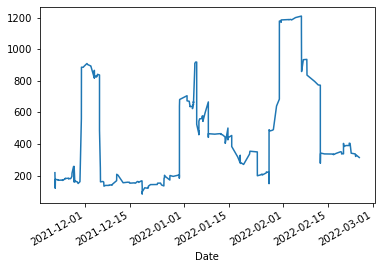

In [4]:
find_outliers(variable='Amount', window=20, sigma=10)